
# **The Causality Playbook: Introduction to Causal Inference**  

## **Exploring Counterfactuals & The Potential Outcomes Framework**  

In this notebook, we will:  
✅ Understand **counterfactual thinking**  
✅ Explore the **Potential Outcomes Framework**  
✅ Simulate data for **causal inference**  
✅ Estimate **causal effects** using basic statistical methods  
✅ Visualize how **confounders distort causal estimation**  

Let's dive in! 🚀  


In [2]:
!pip3 install numpy pandas matplotlib seaborn statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 10.7 MB/s eta 0:00:0000:010:01


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Simulate dataset with causal and spurious relationships
size = 200  # Sample size

# Confounder variable (Z) influencing both X and Y
Z = np.random.normal(50, 10, size)  # Confounder

# Causal Effect Example: Treatment affects Outcome
Treatment = np.random.choice([0, 1], size=size)  # Random treatment assignment
Outcome = 5 * Treatment + np.random.normal(0, 2, size)  # True causal effect

# Spurious Correlation Example: Two unrelated variables correlated through Z
X_spurious = Z * 3 + np.random.normal(0, 5, size)  # Appears related to Y_spurious
Y_spurious = Z * 2 + np.random.normal(0, 5, size)  # Actually driven by Z, not X

# Confounded Relationship: X_conf affects Y_conf, but Z is a confounder
X_conf = Z * 2 + np.random.normal(0, 5, size)  # Dependent on confounder
Y_conf = X_conf * 4 + Z * 1.5 + np.random.normal(0, 5, size)  # Confounder affects both

# Create DataFrame
df = pd.DataFrame({
    "Confounder (Z)": Z,
    "Treatment": Treatment,
    "Outcome": Outcome,
    "X Spurious": X_spurious,
    "Y Spurious": Y_spurious,
    "X Confounded": X_conf,
    "Y Confounded": Y_conf
})

# Save data for use in other notebooks
df.to_csv("causality_data.csv", index=False)

# Display first few rows
df.head()


,Confounder (Z),Treatment,Outcome,X Spurious,Y Spurious,X Confounded,Y Confounded
0,54.967142,1,4.696430,161.668560,108.732656,112.853924,539.017826
1,48.617357,1,6.176634,140.444331,95.360610,95.438254,455.872995
2,56.476885,0,0.561984,177.866364,116.508571,115.907045,547.048297
3,65.230299,1,3.754601,200.099094,132.681914,136.004115,640.880159
4,47.658466,0,-0.416245,142.935536,93.512102,99.419343,468.807067


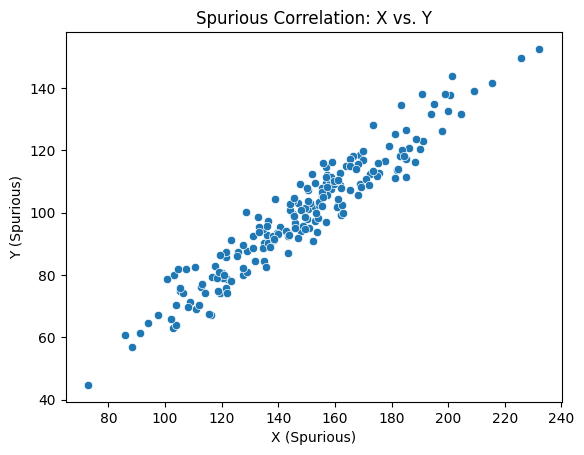

,X Spurious,Y Spurious
X Spurious,1.00000,0.95759
Y Spurious,0.95759,1.00000


In [4]:

# Visualizing Spurious Correlation
sns.scatterplot(x=df["X Spurious"], y=df["Y Spurious"])
plt.xlabel("X (Spurious)")
plt.ylabel("Y (Spurious)")
plt.title("Spurious Correlation: X vs. Y")
plt.show()

# Checking correlation coefficient
df[["X Spurious", "Y Spurious"]].corr()


Raw Correlation (X, Y): 1.00
Adjusted Correlation (X, Y after removing Z's effect): 0.25


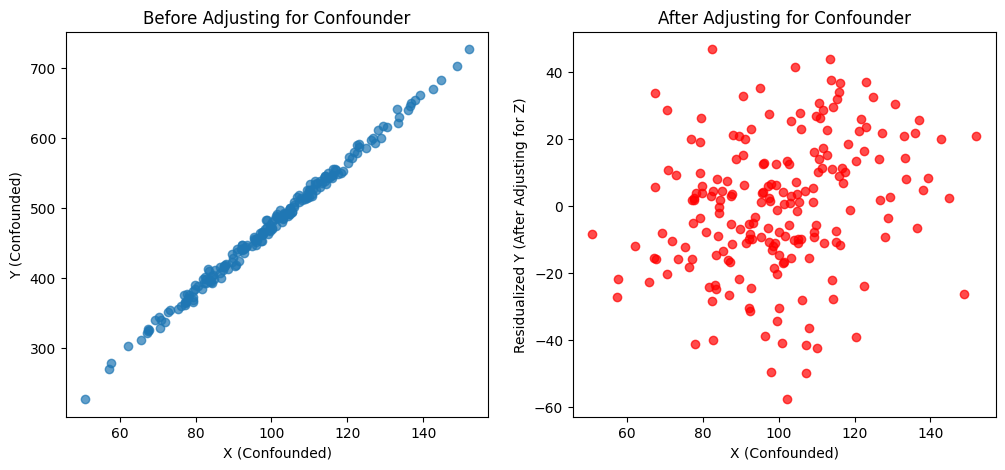

In [5]:

# Compute raw correlation before adjusting for Z
raw_corr = df[["X Confounded", "Y Confounded"]].corr().iloc[0,1]
print(f"Raw Correlation (X, Y): {raw_corr:.2f}")

# Regress Y on Z and compute residuals
residuals = sm.OLS(df["Y Confounded"], sm.add_constant(df["Confounder (Z)"])).fit().resid

# Correlation between X and Y after removing Z's influence
adjusted_corr = np.corrcoef(df["X Confounded"], residuals)[0,1]
print(f"Adjusted Correlation (X, Y after removing Z's effect): {adjusted_corr:.2f}")

# Scatterplot before and after adjustment
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df["X Confounded"], df["Y Confounded"], alpha=0.7)
plt.xlabel("X (Confounded)")
plt.ylabel("Y (Confounded)")
plt.title("Before Adjusting for Confounder")

plt.subplot(1, 2, 2)
plt.scatter(df["X Confounded"], residuals, alpha=0.7, color="red")
plt.xlabel("X (Confounded)")
plt.ylabel("Residualized Y (After Adjusting for Z)")
plt.title("After Adjusting for Confounder")

plt.show()


Estimated Treatment Effect (ATE): 4.83


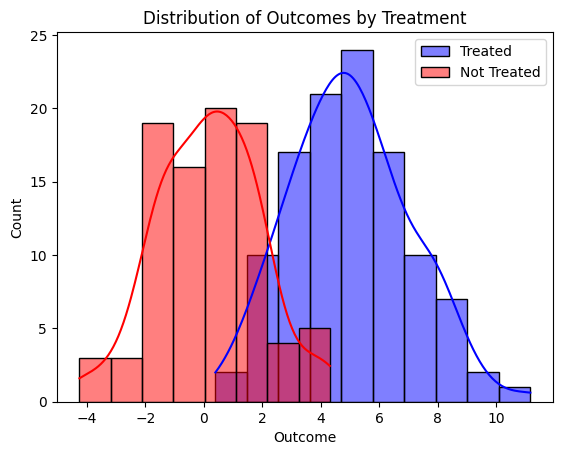

In [6]:

# Estimating the causal effect of treatment on outcome
treatment_effect = df[df["Treatment"] == 1]["Outcome"].mean() - df[df["Treatment"] == 0]["Outcome"].mean()
print(f"Estimated Treatment Effect (ATE): {treatment_effect:.2f}")

# Visualizing Treatment Effects
sns.histplot(df[df["Treatment"] == 1]["Outcome"], color="blue", label="Treated", kde=True)
sns.histplot(df[df["Treatment"] == 0]["Outcome"], color="red", label="Not Treated", kde=True)
plt.legend()
plt.xlabel("Outcome")
plt.title("Distribution of Outcomes by Treatment")
plt.show()



## **Key Takeaways**  

✔️ **Counterfactuals define what *could have happened* under different scenarios.**  
✔️ **The Potential Outcomes Framework models treatment effects rigorously.**  
✔️ **Confounders can distort relationships, making causal estimation challenging.**  
✔️ **Adjusting for confounders reduces bias in causal effect estimation.**  
✔️ **Simple statistical adjustments help estimate causal effects in real-world data.**  

📥 **This dataset is now saved as `causality_data.csv` for further exploration.**  
